# MULTIPLE LINEAR REGRESSION
## Assignment: 7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Description:

The dataset consists of the following variables:

- Age: Age in years
- KM: Accumulated Kilometers on odometer
- FuelType: Fuel Type (Petrol, Diesel, CNG)
- HP: Horse Power
- Automatic: Automatic ( (Yes=1, No=0)
- CC: Cylinder Volume in cubic centimeters
- Doors: Number of doors
- Weight: Weight in Kilograms
- Quarterly_Tax: 
- Price: Offer Price in EUROs


1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [28]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [6]:
# Historgrams for numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()


<Figure size 1200x800 with 0 Axes>

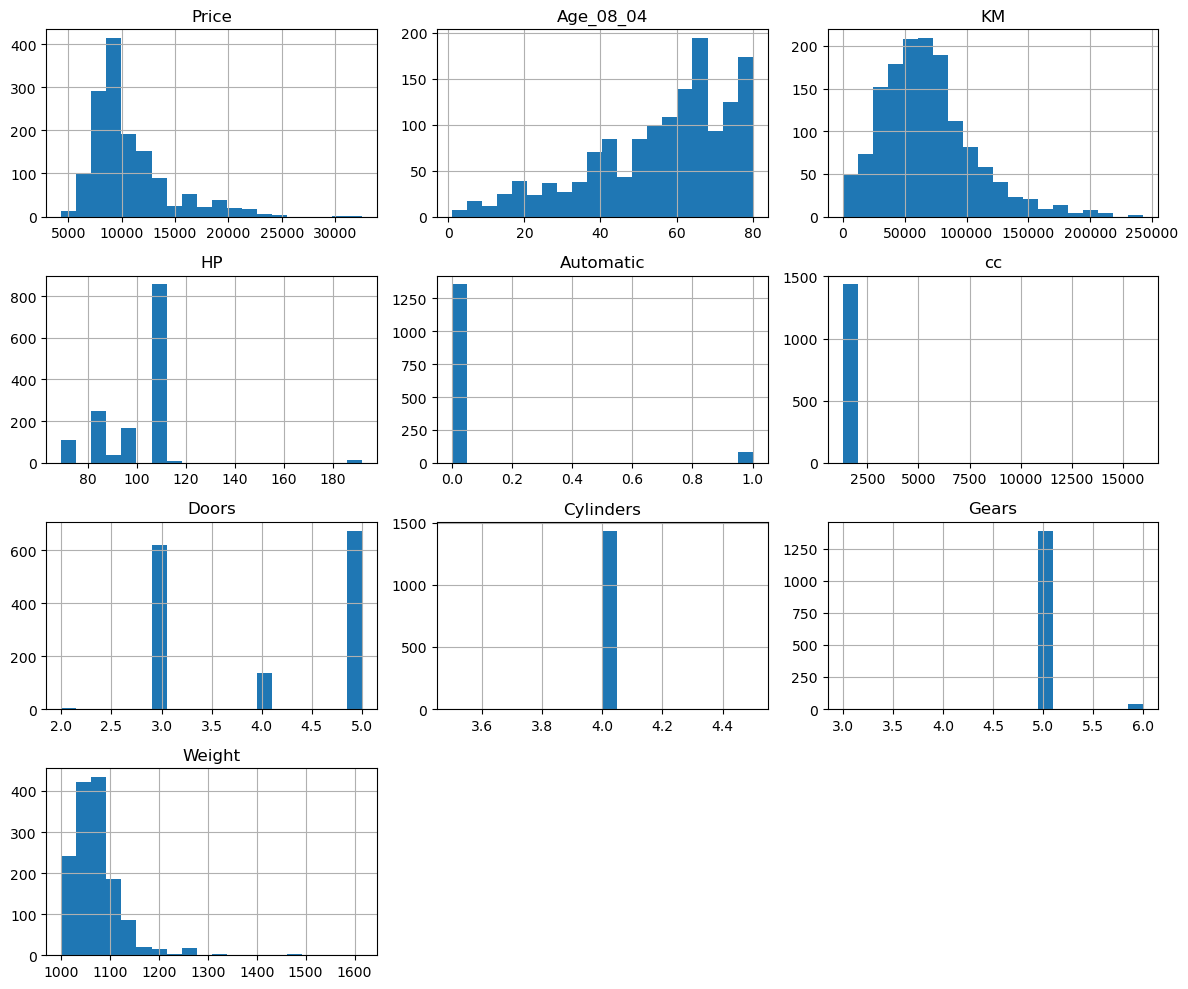

In [7]:
plt.figure(figsize=(12,8))
df[num_cols].hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

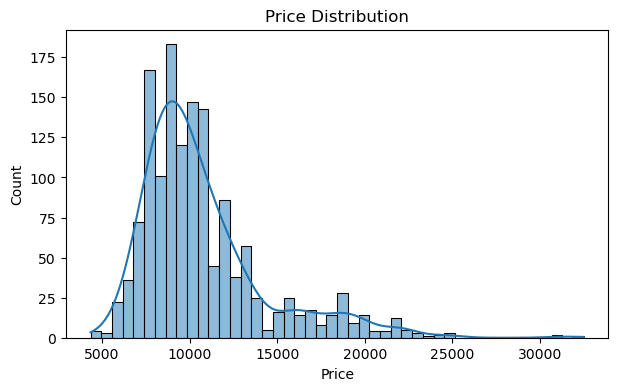

In [8]:
# Price Destribution

plt.figure(figsize=(7,4))
sns.histplot(df['Price'],kde=True)
plt.title("Price Distribution")
plt.show()

Boxplots

In [9]:
imp_features = ['Age_08_04', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']

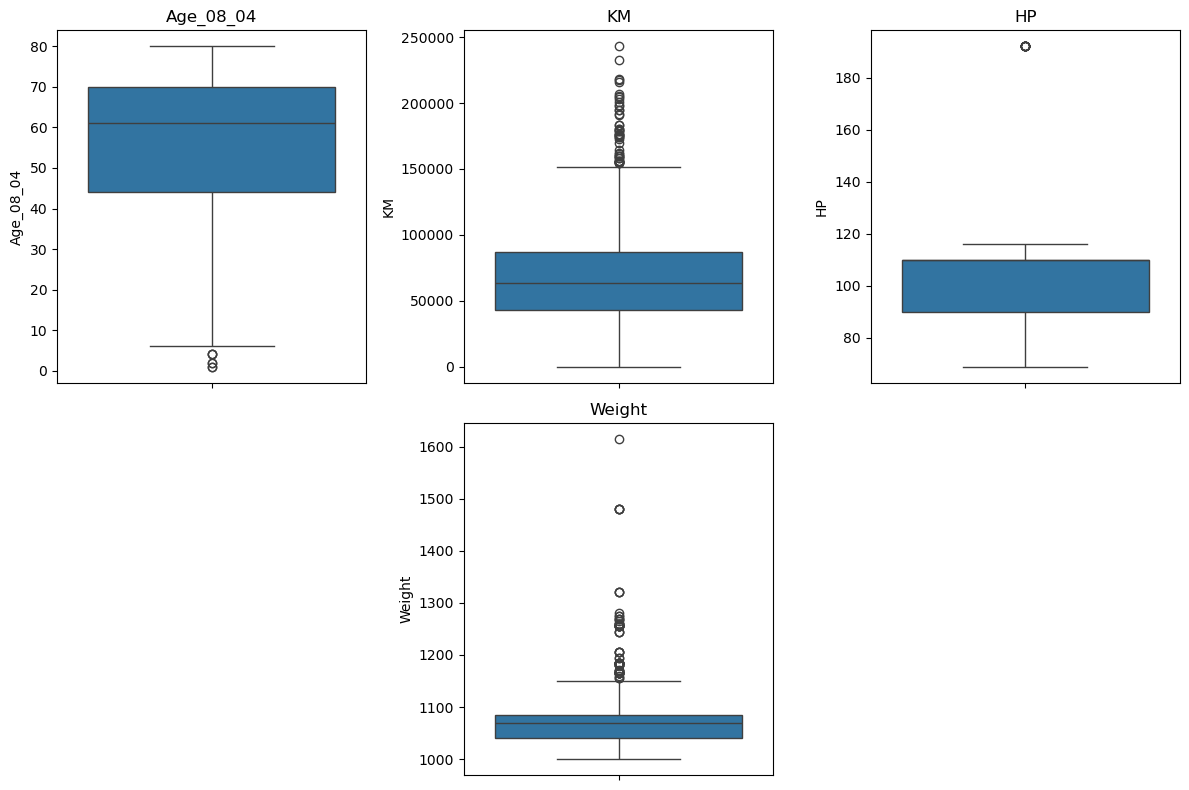

In [10]:
plt.figure(figsize=(12,8))
for i, col in enumerate(imp_features):
    if col in df.columns:
        plt.subplot(2,3,i+1)
        sns.boxplot(y = df[col])
        plt.title(col)
plt.tight_layout()


Scatterplots

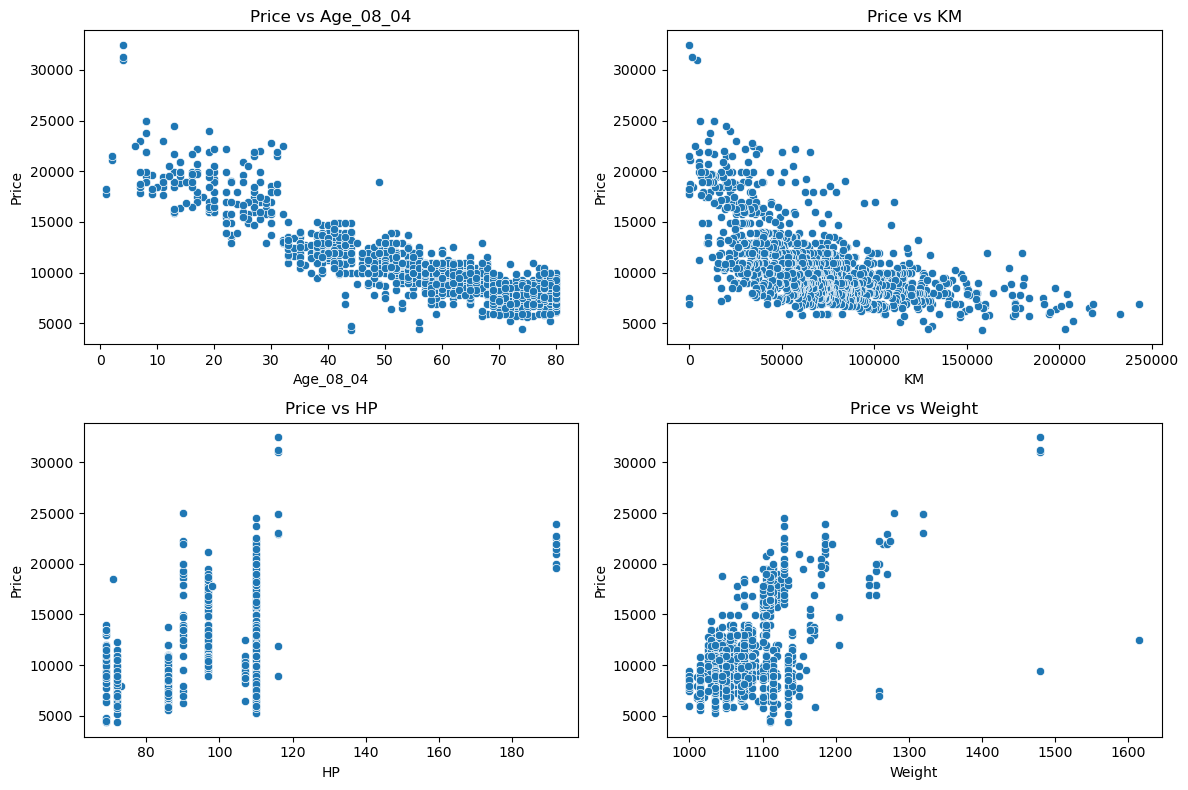

In [11]:
# Scatterplots — Price vs Key Features
scatter_features = ['Age_08_04', 'KM', 'HP', 'Weight']

plt.figure(figsize=(12, 8))
for i, col in enumerate(scatter_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['Price'])
    plt.title(f"Price vs {col}")
plt.tight_layout()
plt.show()

Correlation Heatmap

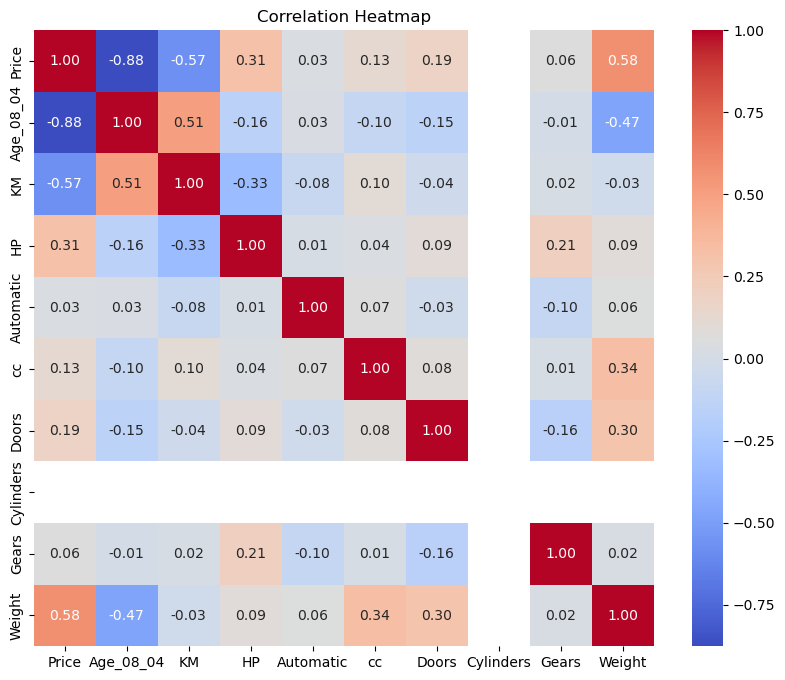

In [12]:
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr,annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

PREPROCESSING FOR MULTIPLE LINEAR REGRESSION (MLR)

In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [14]:
X = df.drop(columns=['Price'])
y = df['Price']

In [15]:
cat_col = X.select_dtypes(include=['object','category']).columns.tolist()
num_col = X.select_dtypes(include=[np.number]).columns.tolist()

In [16]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [17]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first"))
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_col),
        ("cat", categorical_transformer, cat_col)
    ]
)

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( X, y, test_size=0.20, random_state=42
)


In [20]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (1148, 10)
X_test: (288, 10)


# 3) Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

Model 1:- All Features: Includes all variables (Age_08_04, KM, HP, cc, Automatic, Weight, Doors, Quarterly Tax, Fuel_Type)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [22]:
model_1 = Pipeline([('preprocess',preprocessor), ('Ir', LinearRegression())])

In [23]:
model_1.fit(X_train, y_train)
y_pred1 = model_1.predict(X_test)

In [26]:
print("Model_1 Result")
print("RMSE:", (mean_squared_error(y_test, y_pred1))**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred1))
print("R2:", r2_score(y_test, y_pred1))

Model_1 Result
RMSE: 1484.2654153296521
MAE: 990.887273919397
R2: 0.834888804061108


Model 2 : Reduced Features (only strongest predictors)

In [38]:
selected_features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type']
X2_train = X_train[selected_features]
X2_test = X_test[selected_features]

In [30]:
preprocessor = ColumnTransformer([('num',StandardScaler(),['Age_08_04', 'KM', 'HP', 'cc', 'Weight']),('cat', OneHotEncoder(drop='first'),[])])

In [31]:
model_2 = Pipeline([('preprocess',preprocessor), ('Ir', LinearRegression())])

In [32]:
model_2.fit(X2_train, y_train)
y_pred2 = model_2.predict(X2_test)

In [33]:
print("Model_2 Result")
print("RMSE:", (mean_squared_error(y_test, y_pred2))**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("R2:", r2_score(y_test, y_pred2))

Model_2 Result
RMSE: 1412.7861965935833
MAE: 998.5448804175766
R2: 0.8504087218447196


Model 3: Statsmodels OLS (Full Interpretation + p-values)

- Dummy encoding BEFORE splitting
- Data converted to numeric
No “object dtype” error.
- Constant added correctly
- NaN removed
- Re-split X and y

In [39]:
# One-hot encode FuelType
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Ensure all columns are numeric
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')


In [40]:
X3 = df_encoded.drop(columns=['Price'])
y3 = df_encoded['Price']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [41]:
import statsmodels.api as sm

In [42]:
# Add constant column
X3_train_const = sm.add_constant(X3_train)

In [43]:
# Convert everything to float
X3_train_const = X3_train_const.astype(float)
y3_train = y3_train.astype(float)


In [44]:
# Fit OLS model
ols_model = sm.OLS(y3_train, X3_train_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     842.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:10:04   Log-Likelihood:                -9866.8
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1138   BIC:                         1.980e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.186e+04   1508.957     

 | Model                          | Description                                                                                 | Strength                                                                                |
| ------------------------------ | ------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **Model 1: All Features**      | Includes all variables (Age_08_04, KM, HP, cc, Automatic, Weight, Doors, Quarterly Tax, Fuel_Type) | Captures all possible relationships but may suffer from noise or multicollinearity      |
| **Model 2: Reduced Features**  | Includes only strong predictors (Age_08_04, KM, HP, cc, Weight, Fuel_Type)                         | More stable coefficients, higher interpretability, lower noise                          |
| **Model 3: OLS (Statsmodels)** | Full regression analysis with p-values & significance testing                               | Best for academic interpretation; identifies which variables significantly affect price |


## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [45]:
# Model 1 prediction
y_pred1 = model_1.predict(X_test)

In [46]:
# model 2 
y_pred2 = model_2.predict(X2_test)

In [47]:
# model 3 prediction

X3_test = X3.loc[X_test.index]
X3_test_const = sm.add_constant(X3_test)
y_pred3 = ols_model.predict(X3_test_const)

In [51]:
def eval_metrics(y_true, y_pred):
    rmse = (mean_squared_error(y_test, y_pred))**0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [52]:
results = pd.DataFrame({
    "Model": ["Model 1: All Features",
              "Model 2: Reduced Features",
              "Model 3: OLS (Statsmodels)"],

    "RMSE": [
        eval_metrics(y_test, y_pred1)[0],
        eval_metrics(y_test, y_pred2)[0],
        eval_metrics(y_test, y_pred3)[0]
    ],

    "MAE": [
        eval_metrics(y_test, y_pred1)[1],
        eval_metrics(y_test, y_pred2)[1],
        eval_metrics(y_test, y_pred3)[1]
    ],

    "R² Score": [
        eval_metrics(y_test, y_pred1)[2],
        eval_metrics(y_test, y_pred2)[2],
        eval_metrics(y_test, y_pred3)[2]
    ]
})

results

,Model,RMSE,MAE,R² Score
0,Model 1: All Features,1484.265415,990.887274,0.834889
1,Model 2: Reduced Features,1412.786197,998.544880,0.850409
2,Model 3: OLS (Statsmodels),1491.410755,992.301339,0.833295


## 5.Apply Lasso and Ridge methods on the model.

Ridge Regression (L2 Regularization)

- Shrinks coefficients but does not set them to zero.

- Helps handle multicollinearity.

- Produces a more stable model with reduced variance.

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [54]:
ridge_pipe = Pipeline([('preprocess', preprocessor),('ridge',Ridge())])

In [62]:
ridge_params = {
    'ridge__alpha': [0.1, 1, 10, 20, 50, 100]
}

In [63]:
ridge_grid = GridSearchCV(ridge_pipe,ridge_params,cv=5,scoring='neg_root_mean_squared_error')

In [64]:
ridge_grid.fit(X_train, y_train)

,estimator,"Pipeline(step...e', Ridge())])"
,param_grid,"{'ridge__alpha': [0.1, 1, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [69]:
print('Best Ridge Alpha:', ridge_grid.best_params_)

Best Ridge Alpha: {'ridge__alpha': 100}


In [70]:
y_pred_ridge = ridge_grid.predict(X_test)

In [71]:
print("Ridge Regression")
print("RMSE:", (mean_squared_error(y_test, y_pred_ridge))**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("R2:", r2_score(y_test, y_pred_ridge))

Ridge Regression
RMSE: 1427.5150574223337
MAE: 1002.1550086983821
R2: 0.8472733651833668


Lasso Regression (L1 Regularization)

- Can shrink some coefficients exactly to zero.

- Performs feature selection.

- Helps identify the most important predictors.

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lasso_pipe = Pipeline([('preprocess', preprocessor),('lasso',Lasso(max_iter=10000))])

In [74]:
lasso_params = {
    'lasso__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [75]:
lasso_grid = GridSearchCV(lasso_pipe,lasso_params,cv=5,scoring='neg_root_mean_squared_error')

In [76]:
lasso_grid.fit(X_train, y_train)

,estimator,Pipeline(step...iter=10000))])
,param_grid,"{'lasso__alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [77]:
print('Best Lasso Alpha:', lasso_grid.best_params_)

Best Lasso Alpha: {'lasso__alpha': 10}


In [78]:
y_pred_lasso = lasso_grid.predict(X_test)

In [79]:
print("Lasso Regression")
print("RMSE:", (mean_squared_error(y_test, y_pred_lasso))**0.5)
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("R2:", r2_score(y_test, y_pred_lasso))

Lasso Regression
RMSE: 1411.5249788593505
MAE: 998.3557964927649
R2: 0.8506756878728267


# Interview Questions:
1.What is Normalization & Standardization and how is it helpful?

Ans:
Normalization and Standardization are feature-scaling techniques used to bring all input variables onto a similar scale, which helps ML models lean more effectively.

Normalization:

- Normalization scales the data into a fixed range, typically 0 to 1.
- It’s useful when the data does not follow a normal distribution.
- Distance-based algorithms like KNN, K-Means, or Neural Networks, where larger values can dominate smaller ones.

Standardization:

- Standardization transforms the data so that it has mean = 0 and standard deviation = 1.
- It keeps the original distribution shape but centers and scales it
- This is essential for algorithms that assume normally distributed data, such as Linear Regression, Logistic Regression, SVM, Lasso, Ridge, and PCA.

Normalization is best for distance-based models, and Standardization is essential for regression and regularization techniques because it ensures fair weight learning across all features.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans: To handle multicollinearity, I typically check correlations, compute VIF, remove or combine correlated predictors, or apply Ridge/Lasso regularization to stabilize the regression coefficients.